# ÌîÑÎ°úÏ†ùÌä∏: Ï£ºÏãù ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥ Î≥¥Ïûê
- ARIMAÎ•º ÌÜµÌï¥ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÎäî Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥ Î≥¥ÏïòÏäµÎãàÎã§.
- Ïù¥Ï†ú Ïã§Ï†ú Ï£ºÏãùÍ∞í ÏòàÏ∏°Ïóê ÎèÑÏ†ÑÌï¥ Î¥ÖÏãúÎã§. Îç∞Ïù¥ÌÑ∞Îäî Í≥ºÍ±∞Ïùò ÏùºÏûêÎ≥Ñ ÏãúÏÑ∏ÏûÖÎãàÎã§.
- Ïö∞ÏÑ† ÎåÄÌïúÎØºÍµ≠ ÎåÄÏû•Ï£º ÏÇºÏÑ±Ï†ÑÏûêÏóê ÎåÄÌïú Ï£ºÏãù ÏãúÏÑ∏Î•º ÏòàÏ∏°Ìï¥ Î¥ÖÏãúÎã§.

## STEP 1. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
- ÏπºÎüº Ï¢ÖÎ•ò: Date, Open, High, Low, Close, Adj Close, Volume
- ÎÇ†ÏßúÎ≥ÑÎ°ú ÏãúÏûëÍ∞Ä(Open), ÏµúÍ≥†Í∞Ä(High), ÏµúÏ†ÄÍ∞Ä(Low), Ï¢ÖÍ∞Ä(Close), ÏàòÏ†ïÏ¢ÖÍ∞Ä(Adj Close), Í±∞ÎûòÎüâ(Volume)Ïù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
- Ïö∞Î¶¨Îäî Ï¢ÖÍ∞Ä(Close)Îßå ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. (Ï£ºÏãù ÏãúÏû•ÏùÄ Ï†ïÌï¥ÏßÑ ÏãúÍ∞Ñ ÎèôÏïàÎßå Í±∞ÎûòÍ∞Ä Í∞ÄÎä•Ìï©ÎãàÎã§. Ï¢ÖÍ∞ÄÎûÄ ÌïòÎ£®Ïùò Ïû•Ïù¥ ÎßàÍ∞êÌïòÏòÄÏùÑ ÎïåÏùò Í∞ÄÍ≤©ÏûÖÎãàÎã§.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams

# Time Series ÏÉùÏÑ±

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

## STEP 2. Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
- Î°úÍ∑∏ Î≥ÄÌôò

In [2]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§.

Series([], Name: Close, dtype: float64)

In [3]:
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts)

## ÌïÑÏöî Ìï®Ïàò Copy

In [4]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # Ïù¥ÎèôÌèâÍ∑† ÏãúÍ≥ÑÏó¥
    rolstd = timeseries.rolling(window=window).std()    # Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞® ÏãúÍ≥ÑÏó¥

     # ÏõêÎ≥∏ÏãúÍ≥ÑÏó¥, Ïù¥ÎèôÌèâÍ∑†, Ïù¥ÎèôÌëúÏ§ÄÌé∏Ï∞®Î•º plotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌï¥ Î≥∏Îã§.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('Ïäù=3')

Ïäù=3


In [5]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels Ìå®ÌÇ§ÏßÄÏóêÏÑú Ï†úÍ≥µÌïòÎäî adfuller Î©îÏÑúÎìúÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller Î©îÏÑúÎìúÍ∞Ä Î¶¨ÌÑ¥Ìïú Í≤∞Í≥ºÎ•º Ï†ïÎ¶¨ÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('Ïäù=3')

Ïäù=3


## STEP 3. ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù
- Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
- Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
- ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
- Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

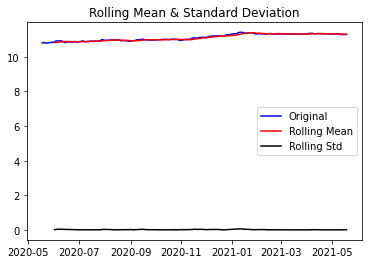

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


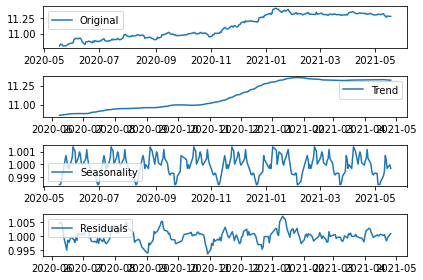

In [6]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [7]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


## STEP 4. ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
- ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

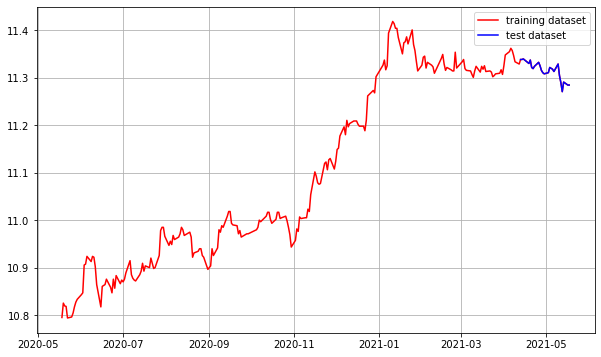

In [8]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

## STEP 5. Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
- ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
- Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

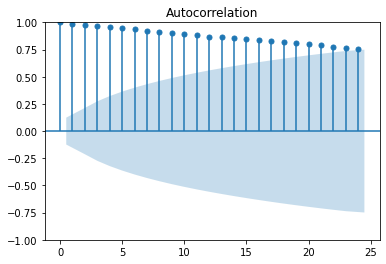

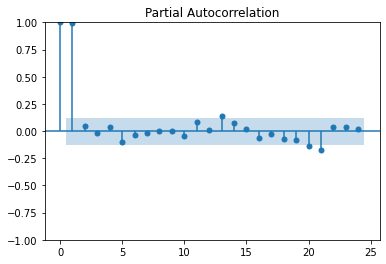

In [9]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


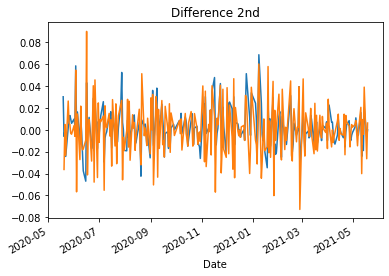

In [10]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

## STEP 6. ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
- ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
- Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
- ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(2, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 583.361
Date:                Tue, 15 Feb 2022   AIC                          -1156.722
Time:                        05:19:33   BIC                          -1139.642
Sample:                             0   HQIC                         -1149.828
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.129     86.277      0.000      10.838      11.342
ar.L1          0.7739      1.821      0.425      0.671      -2.796       4.344
ar.L2          0.2191      1.811      0.121      0.9

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


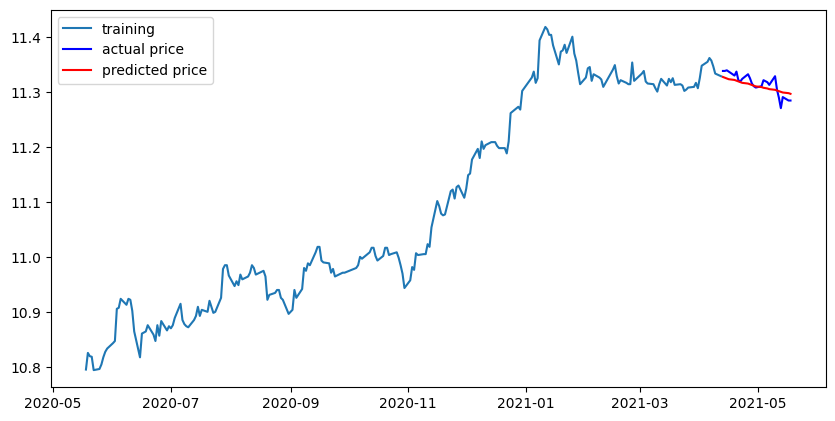

In [12]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1048973.6014239907
MAE:  843.7579531508708
RMSE:  1024.19412292006
MAPE: 1.03%


## STEP 7 (1). Îã§Î•∏ Ï£ºÏãù Ï¢ÖÎ™© ÏòàÏ∏°Ìï¥ Î≥¥Í∏∞: Apple Inc.
- Í¥ÄÏã¨ Ï¢ÖÎ™©ÏùÑ Í≥®Îùº ÏúÑ STEP 1~6Ïùò Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌï¥ Î≥¥Í∏∞

### 1. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [14]:
# Time Series ÏÉùÏÑ±

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/AAPL.csv' #Apple Inc.
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-16    133.190002
2021-02-17    130.839996
2021-02-18    129.710007
2021-02-19    129.869995
2021-02-22    126.000000
Name: Close, dtype: float64

### 2. Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ
- Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨, Î°úÍ∑∏ Î≥ÄÌôò

In [15]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§.
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts)

### 3. ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù¬∂
- Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
- Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
- ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(Time Series Decomposition)
- Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏

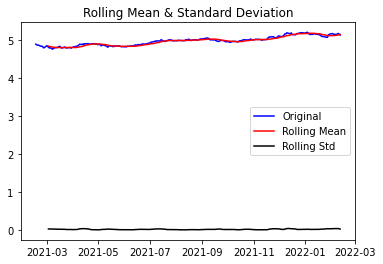

Results of Dickey-Fuller Test:
Test Statistic                  -0.749423
p-value                          0.833529
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


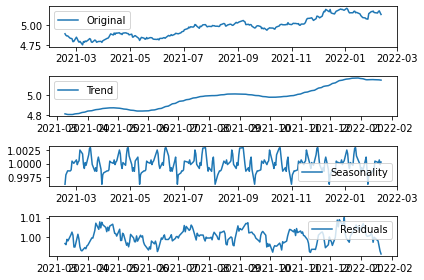

In [16]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [17]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.853624
p-value                          0.000043
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


- p=0.000043Ïù¥ÎØÄÎ°ú Ï∂©Î∂ÑÌûà ÏïàÏ†ïÏ†ÅÏù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÏùå

### 4. ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
- ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

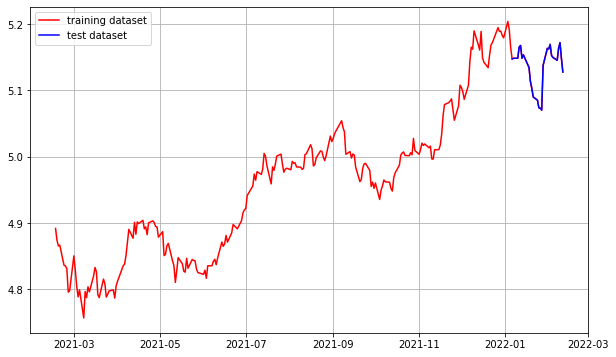

In [18]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### 5. Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
- ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
- Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

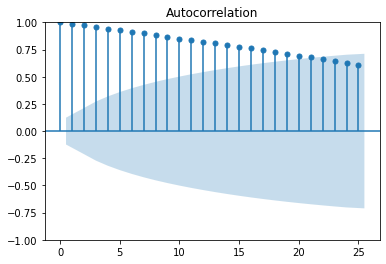

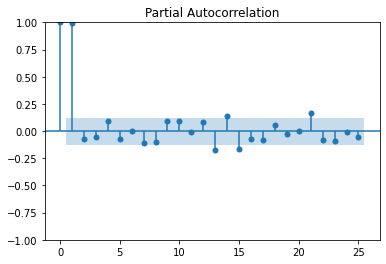

In [19]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

- ACF: Ï†êÏ∞®Ï†ÅÏúºÎ°ú Í∞êÏÜå. Ï†ÅÌï©Ìïú qÍ∞íÏù¥ ÏóÜÏñ¥ Î≥¥ÏûÑ 
- PACF: Time lag 1ÏóêÏÑú 1.0ÏùÑ Î≥¥Ïù¥Í≥† Ïù¥ÌõÑÏóê Í∏âÍ≤©Ìûà Í∞êÏÜå. Îî∞ÎùºÏÑú p=1Ïù¥ Ï†ÅÎãπÌïòÎã§Í≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏùå
- (ÏùºÎ∞òÏ†ÅÏúºÎ°ú, ÏùºÎ∞òÏ†ÅÏúºÎ°ú p + q < 2, p * q = 0 Ïù∏ Í∞íÏùÑ ÏÇ¨Ïö©ÌïúÎã§Í≥† Ìï®... ÍµêÏû¨)
<br> <br>
- p=1, q=0 Ïù¥ Ï†ÅÎãπÌïòÎã§Í≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏùå 

Results of Dickey-Fuller Test:
Test Statistic                -1.598219e+01
p-value                        6.815993e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


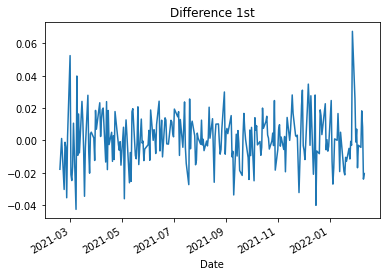

In [20]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# ÌòπÏãú ÌïÑÏöîÌïú Í≤ΩÏö∞ 2Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
#diff_2 = diff_1.diff(periods=1).iloc[1:]
#diff_2.plot(title='Difference 2nd')

#augmented_dickey_fuller_test(diff_2)

- 1Ï∞® Ï∞®Î∂Ñ: p-value = 6.815993e-29Ïù¥ÎØÄÎ°ú ÏïàÏ†ïÌôî ÏÉÅÌÉúÎ•º Î≥¥ÏûÑ. d=1Ïù¥ Ï†ÅÎãπÌïòÎã§Í≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏùå

### 6. ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
- ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
- Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
- ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [21]:
# Build Model
#model = ARIMA(train_data, order=(0, 1, 1))  # order = (p, d, q)
#model = ARIMA(train_data, order=(14, 1, 0))  # order = (p, d, q)
#model = ARIMA(train_data, order=(60, 1, 0))  # order = (p, d, q)
#model = ARIMA(train_data, order=(45, 1, 0))  # order = (p, d, q)
#model = ARIMA(train_data, order=(40, 1, 0))  # order = (p, d, q)
#model = ARIMA(train_data, order=(35, 1, 0))  # order = (p, d, q)
#model = ARIMA(train_data, order=(33, 1, 0))  # order = (p, d, q)
#model = ARIMA(train_data, order=(34, 1, 0))  # order = (p, d, q)
#model = ARIMA(train_data, order=(38, 1, 0))  # order = (p, d, q)
#model = ARIMA(train_data, order=(36, 1, 0))  # order = (p, d, q)
model = ARIMA(train_data, order=(37, 1, 0))  # order = (p, d, q)

fitted_m = model.fit()

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                ARIMA(37, 1, 0)   Log Likelihood                 643.066
Date:                Tue, 15 Feb 2022   AIC                          -1210.131
Time:                        05:19:58   BIC                          -1080.319
Sample:                             0   HQIC                         -1157.738
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0731      0.077     -0.945      0.345      -0.225       0.079
ar.L2         -0.0132      0.077     -0.172      0.863      -0.164       0.137
ar.L3         -0.0286      0.078     -0.365      0.7

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


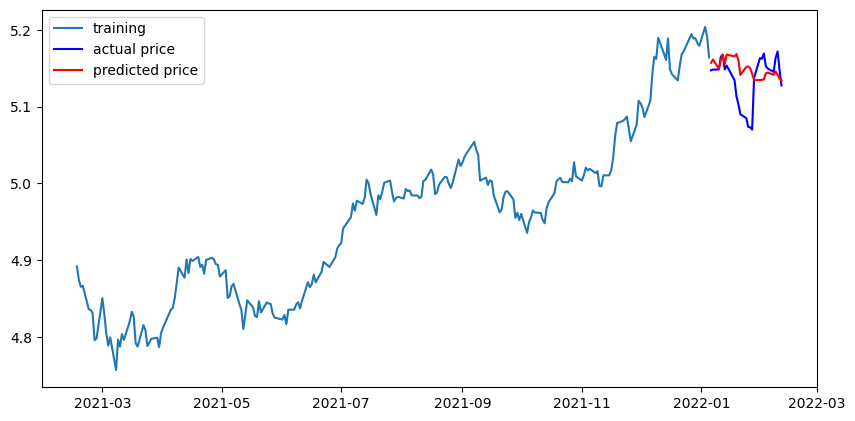

In [22]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [23]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  39.739319809333146
MAE:  4.666469220868483
RMSE:  6.303913055343732
MAPE: 2.81%


- (p, d, q) = (0, 1, 1)Ïù∏ Í≤ΩÏö∞, MAPE: 3.31%
- (p, d, q) = (0, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 3.14%
- (p, d, q) = (14, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 3.53%
- (p, d, q) = (30, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 3.11%
- (p, d, q) = (45, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 2.99%
- (p, d, q) = (60, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 3.15%
- (p, d, q) = (40, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 2.95%
- (p, d, q) = (38, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 2.84%
- (p, d, q) = (37, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 2.81%
- (p, d, q) = (36, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 3.01%
- (p, d, q) = (35, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 2.85%
- (p, d, q) = (34, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 2.90%
- (p, d, q) = (33, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 3.28%
<br> <br>
- (p, d, q) = (37, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 2.81% ÏµúÏÜåÍ∞í(?) üòâ


## STEP 7 (2). Îã§Î•∏ Ï£ºÏãù Ï¢ÖÎ™© ÏòàÏ∏°Ìï¥ Î≥¥Í∏∞: Lam Research
- Í¥ÄÏã¨ Ï¢ÖÎ™©ÏùÑ Í≥®Îùº ÏúÑ STEP 1~6Ïùò Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌï¥ Î≥¥Í∏∞

### 1. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [24]:
# Time Series ÏÉùÏÑ±

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/LRCX.csv' #Lam Research
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-16    591.789978
2021-02-17    585.909973
2021-02-18    577.770020
2021-02-19    598.409973
2021-02-22    567.799988
Name: Close, dtype: float64

### 2. Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ

In [25]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§.
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts)

### 3. ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

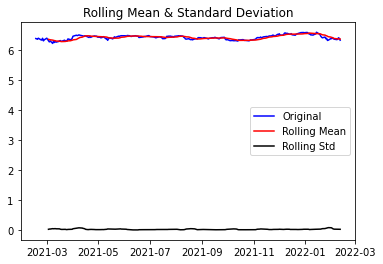

Results of Dickey-Fuller Test:
Test Statistic                  -2.798679
p-value                          0.058463
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


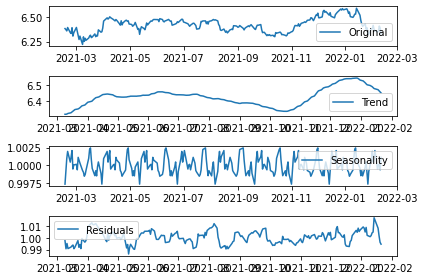

In [26]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [27]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.063729
p-value                          0.000017
#Lags Used                       2.000000
Number of Observations Used    219.000000
Critical Value (1%)             -3.460567
Critical Value (5%)             -2.874830
Critical Value (10%)            -2.573853
dtype: float64


- p=0.000017Ïù¥ÎØÄÎ°ú Ï∂©Î∂ÑÌûà ÏïàÏ†ïÏ†ÅÏù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÏùå

### 4. ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
- ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

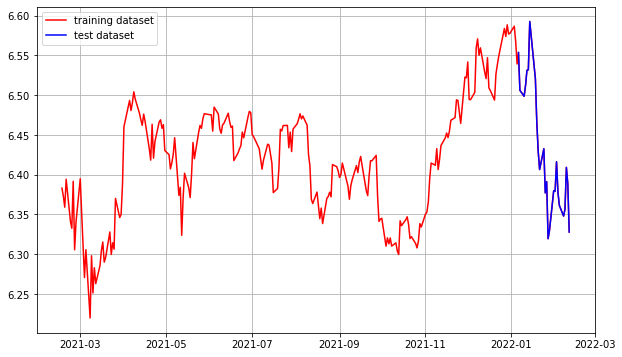

In [28]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### 5. Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
- ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
- Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

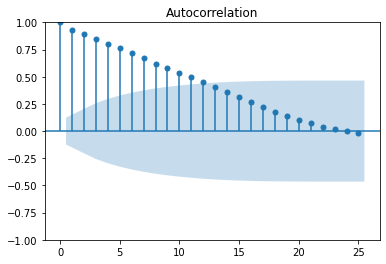

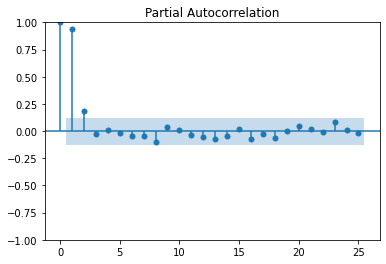

In [29]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

- ACF: Time lag 24Î•º Í∏∞Ï§ÄÏúºÎ°ú ÏûêÍ∏∞ÏÉÅÍ¥ÄÏù¥ ÏñëÏóêÏÑú ÏùåÏúºÎ°ú Î≥ÄÎèô 
- PACF: Time lag 1ÏóêÏÑú ÏïΩ 0.9Î•º Î≥¥Ïù¥Í≥† Ïù¥ÌõÑÏóê Í∏âÍ≤©Ìûà Í∞êÏÜå. Îî∞ÎùºÏÑú p=1Ïù¥ Ï†ÅÎãπÌïòÎã§Í≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏùå
- (ÏùºÎ∞òÏ†ÅÏúºÎ°ú, ÏùºÎ∞òÏ†ÅÏúºÎ°ú p + q < 2, p * q = 0 Ïù∏ Í∞íÏùÑ ÏÇ¨Ïö©ÌïúÎã§Í≥† Ìï®... ÍµêÏû¨)
<br> <br>
- p=1, q=0 Ïù¥ Ï†ÅÎãπÌïòÎã§Í≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏùå 

Results of Dickey-Fuller Test:
Test Statistic                 -18.891165
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


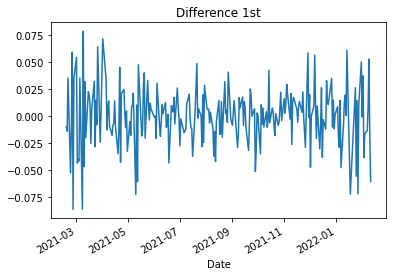

In [30]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

- 1Ï∞® Ï∞®Î∂Ñ: p-value = 0.000000Ïù¥ÎØÄÎ°ú ÏïàÏ†ïÌôî ÏÉÅÌÉúÎ•º Î≥¥ÏûÑ. d=1Ïù¥ Ï†ÅÎãπÌïòÎã§Í≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏùå

### 6. ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
- ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
- Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
- ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [31]:
# Build Model
model = ARIMA(train_data, order=(30, 1, 0))  # order = (p, d, q)

fitted_m = model.fit()

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                ARIMA(30, 1, 0)   Log Likelihood                 521.143
Date:                Tue, 15 Feb 2022   AIC                           -980.286
Time:                        05:20:14   BIC                           -874.386
Sample:                             0   HQIC                          -937.544
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2175      0.066     -3.301      0.001      -0.347      -0.088
ar.L2         -0.0034      0.070     -0.048      0.961      -0.142       0.135
ar.L3         -0.0279      0.065     -0.426      0.6

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


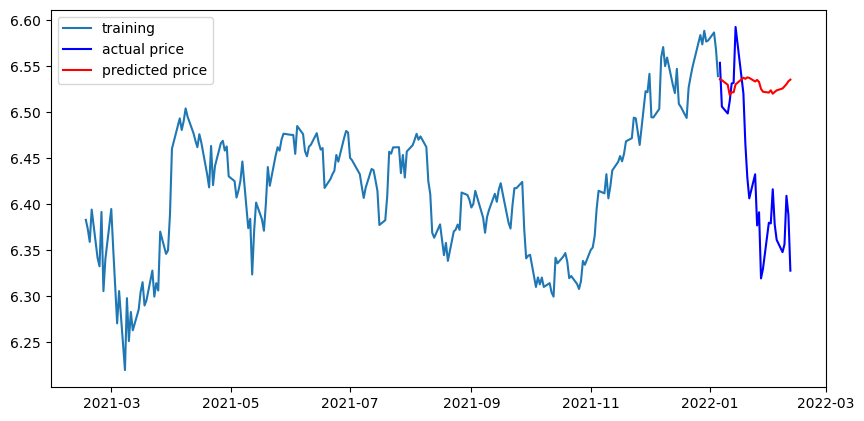

In [32]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [33]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  6380.14235582877
MAE:  69.03483440831516
RMSE:  79.87579330328288
MAPE: 11.64%


- (p, d, q) = (1, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 13.04%
- (p, d, q) = (0, 1, 1)Ïù∏ Í≤ΩÏö∞, MAPE: 13.20%
- (p, d, q) = (0, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 12.54%
- (p, d, q) = (14, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 12.62%
- (p, d, q) = (30, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 11.64%
- (p, d, q) = (37, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 12.38%
<br> <br>
- MAPE 15% ÎØ∏ÎßåÏù¥ÎØÄÎ°ú Ï¢ÖÎ£å üòâ

## STEP 7 (3). Îã§Î•∏ Ï£ºÏãù Ï¢ÖÎ™© ÏòàÏ∏°Ìï¥ Î≥¥Í∏∞: Tesla, Inc.
- Í¥ÄÏã¨ Ï¢ÖÎ™©ÏùÑ Í≥®Îùº ÏúÑ STEP 1~6Ïùò Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌï¥ Î≥¥Í∏∞

### 1. ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [34]:
# Time Series ÏÉùÏÑ±

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/TSLA.csv' #Tesla, Inc.
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2021-02-16    796.219971
2021-02-17    798.150024
2021-02-18    787.380005
2021-02-19    781.299988
2021-02-22    714.500000
Name: Close, dtype: float64

### 2. Í∞ÅÏ¢Ö Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ

In [35]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
ts = ts.interpolate(method='time')
ts[ts.isna()]  # Time SeriesÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Î∂ÄÎ∂ÑÎßå SeriesÎ°ú Ï∂úÎ†•Ìï©ÎãàÎã§.
# Î°úÍ∑∏ Î≥ÄÌôò
ts_log = np.log(ts)

### 3. ÏãúÍ≥ÑÏó¥ ÏïàÏ†ïÏÑ± Î∂ÑÏÑù

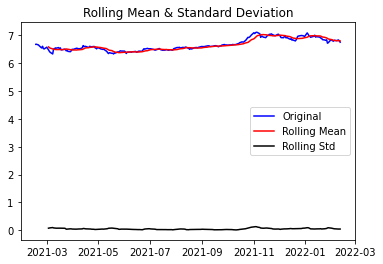

Results of Dickey-Fuller Test:
Test Statistic                  -1.323238
p-value                          0.618475
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


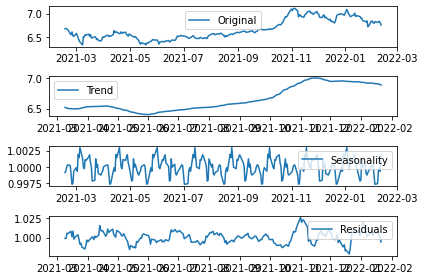

In [36]:
# Ï†ïÏÑ±Ï†Å Í∑∏ÎûòÌîÑ Î∂ÑÏÑù
plot_rolling_statistics(ts_log, window=12)

#Ï†ïÎüâÏ†Å Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

#ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Time Series Decomposition)
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [37]:
# Residual ÏïàÏ†ïÏÑ± ÌôïÏù∏
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.540508e+00
p-value                        9.372617e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


- p=9.372617e-09Ïù¥ÎØÄÎ°ú Ï∂©Î∂ÑÌûà ÏïàÏ†ïÏ†ÅÏù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÏùå

### 4. ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
- ÌïôÏäµ, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨

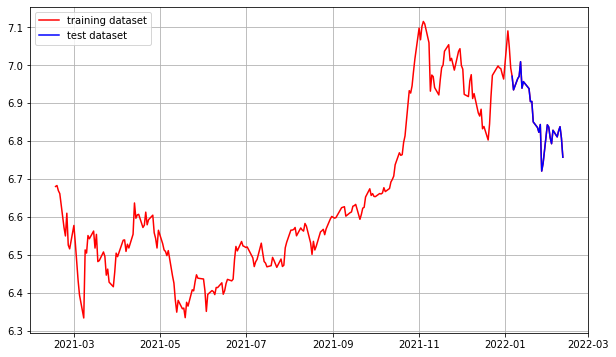

In [38]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_dataÎ•º Ï†ÅÏö©ÌïòÎ©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÅäÏñ¥Ï†∏ Î≥¥Ïù¥ÎØÄÎ°ú ÏûêÏó∞Ïä§Îü¨Ïö¥ Ïó∞Ï∂úÏùÑ ÏúÑÌï¥ ts_logÎ•º ÏÑ†ÌÉù
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

### 5. Ï†ÅÏ†ï ARIMA Î™®Ïàò Ï∞æÍ∏∞
- ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
- Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

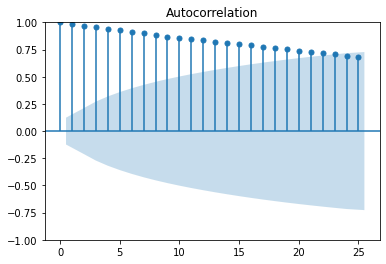

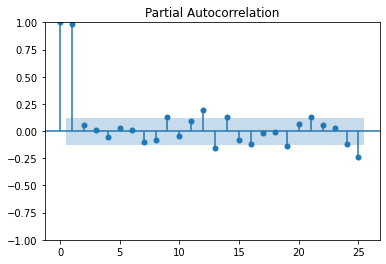

In [39]:
# ACF, PACF Í∑∏Î†§Î≥¥Í∏∞ -> p,q Íµ¨ÌïòÍ∏∞
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plot_pacf(ts_log)  # PACF : Partial Autocorrelation Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.show()

- ACF: Ï†êÏ∞®Ï†ÅÏúºÎ°ú Í∞êÏÜå. Ï†ÅÌï©Ìïú qÍ∞íÏù¥ ÏóÜÏñ¥ Î≥¥ÏûÑ 
- PACF: Time lag 1ÏóêÏÑú 1.0ÏùÑ Î≥¥Ïù¥Í≥† Ïù¥ÌõÑÏóê Í∏âÍ≤©Ìûà Í∞êÏÜå. Îî∞ÎùºÏÑú p=1Ïù¥ Ï†ÅÎãπÌïòÎã§Í≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏùå
- (ÏùºÎ∞òÏ†ÅÏúºÎ°ú, ÏùºÎ∞òÏ†ÅÏúºÎ°ú p + q < 2, p * q = 0 Ïù∏ Í∞íÏùÑ ÏÇ¨Ïö©ÌïúÎã§Í≥† Ìï®... ÍµêÏû¨)
<br> <br>
- p=1, q=0 Ïù¥ Ï†ÅÎãπÌïòÎã§Í≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏùå 

Results of Dickey-Fuller Test:
Test Statistic                -1.671339e+01
p-value                        1.428356e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


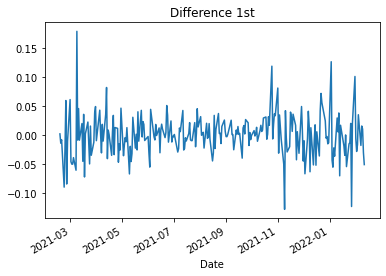

In [40]:
# Ï∞®Î∂Ñ ÏïàÏ†ïÏÑ± ÌôïÏù∏ -> d Íµ¨ÌïòÍ∏∞

# 1Ï∞® Ï∞®Î∂Ñ Íµ¨ÌïòÍ∏∞
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

- 1Ï∞® Ï∞®Î∂Ñ: p-value = 1.428356e-29Ïù¥ÎØÄÎ°ú ÏïàÏ†ïÌôî ÏÉÅÌÉúÎ•º Î≥¥ÏûÑ. d=1Ïù¥ Ï†ÅÎãπÌïòÎã§Í≥† Ï∂îÏ∏°Ìï† Ïàò ÏûàÏùå

### 6. ARIMA Î™®Îç∏ ÌõàÎ†®Í≥º ÌÖåÏä§Ìä∏
- ARIMA Î™®Îç∏ ÎπåÎìúÏôÄ ÌõàÎ†®
- Î™®Îç∏ ÌÖåÏä§Ìä∏ Î∞è ÌîåÎ°úÌåÖ
- ÏµúÏ¢Ö ÏòàÏ∏° Î™®Îç∏ Ï†ïÌôïÎèÑ Ï∏°Ï†ï(MAPE)

In [41]:
# Build Model
model = ARIMA(train_data, order=(14, 1, 0))  # order = (p, d, q)
fitted_m = model.fit()

print(fitted_m.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retva

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                ARIMA(14, 1, 0)   Log Likelihood                 443.353
Date:                Tue, 15 Feb 2022   AIC                           -856.705
Time:                        05:20:20   BIC                           -805.464
Sample:                             0   HQIC                          -836.024
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0272      0.069     -0.394      0.694      -0.163       0.108
ar.L2          0.0103      0.060      0.173      0.863      -0.107       0.127
ar.L3          0.0273      0.072      0.377      0.7

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


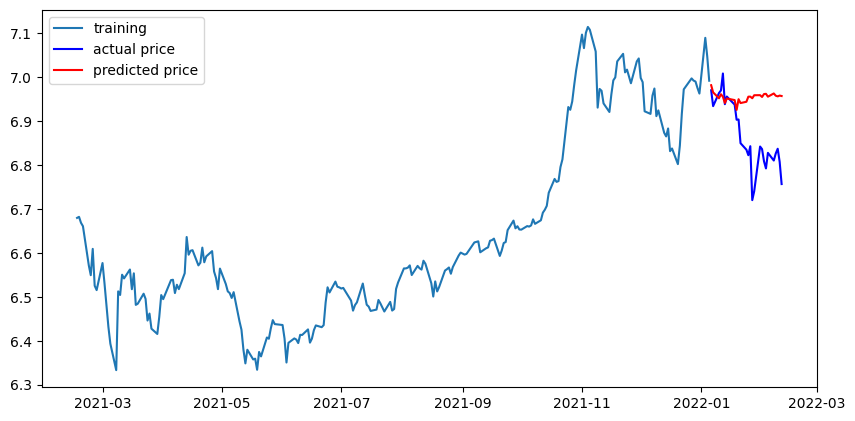

In [42]:
# Forecast : Í≤∞Í≥ºÍ∞Ä fcÏóê Îã¥ÍπÅÎãàÎã§. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # ÏòàÏ∏°Í≤∞Í≥º

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()

In [43]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  13483.469756470351
MAE:  95.57835277132767
RMSE:  116.11834375528422
MAPE: 10.52%


- (p, d, q) = (1, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 14.52%
- (p, d, q) = (0, 1, 1)Ïù∏ Í≤ΩÏö∞, MAPE: 14.56%
- (p, d, q) = (0, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 14.21%
- (p, d, q) = (14, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 10.52%
- (p, d, q) = (30, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 14.18%
- (p, d, q) = (10, 1, 0)Ïù∏ Í≤ΩÏö∞, MAPE: 13.78%
<br> <br>
- MAPE 15% ÎØ∏ÎßåÏù¥ÎØÄÎ°ú Ï¢ÖÎ£å üòâ

### ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∞Ä

| ÌèâÍ∞ÄÎ¨∏Ìï≠ | ÏÉÅÏÑ∏Í∏∞Ï§Ä | Ïã§Ìñâ Í≤∞Í≥º |
|:---|:---|:---|
| 1. ÏãúÍ≥ÑÏó¥Ïùò ÏïàÏ†ïÏÑ±Ïù¥ Ï∂©Î∂ÑÌûà ÌôïÏù∏ÎêòÏóàÎäîÍ∞Ä? | ÌîåÎ°úÌåÖÍ≥º adfuller Î©îÏÜåÎìúÍ∞Ä Î™®Îëê Ï†ÅÏ†àÌûà ÏÇ¨Ïö©ÎêòÏóàÏùå | ÏÇ¨Ïö©ÌñàÏùå |
| 2. ARIMA Î™®Îç∏ Î™®ÏàòÏÑ†ÌÉù Í∑ºÍ±∞Î•º Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Ï†úÏãúÌïòÏòÄÎäîÍ∞Ä? | p,qÎ•º ÏúÑÌïú ACF, PACF ÏÇ¨Ïö©Í≥º dÎ•º ÏúÑÌïú Ï∞®Î∂Ñ Í≥ºÏ†ïÏù¥ Î™ÖÌôïÌûà Ï†úÏãúÎê® | Ï†úÏãúÌïòÏòÄÏùå |
| 3. ÏòàÏ∏° Î™®Îç∏Ïùò Ïò§Ï∞®Ïú®Ïù¥ Í∏∞Ï§Ä Ïù¥ÌïòÎ°ú Ï†ïÌôïÌïòÍ≤å ÎÇòÏôîÎäîÍ∞Ä? | 3Í∞ú Ïù¥ÏÉÅ Ï¢ÖÎ™©Ïù¥ MAPE 15% ÎØ∏ÎßåÏùò Ï†ïÌôïÎèÑÎ°ú ÏòàÏ∏°Îê® | Apple, Lam Research, Tesla 3Í∞ú ÏÇ¨<br> Î™®Îëê 15%ÎØ∏Îßå ÎÇòÏò¥ ||

### ÌöåÍ≥†
- Ï∂îÍ∞ÄÎ°ú 3Í∞úÏÇ¨Ïóê ÎåÄÌï¥ Ï£ºÍ∞Ä ÏòàÏ∏° ÏàòÌñâÌñàÏùå
- Time Series ForecastingÍ≥º Í∑∏ Ï§ë ARIMA Î™®Îç∏Ïóê ÎåÄÌïú Ïù¥Ìï¥Î•º ÌïòÏòÄÏùå
- ÏúÑÏùò Î™®Îì† Í≤ΩÏö∞Ïóê ÏûàÏñ¥ÏÑú PACF Í≤∞Í≥ºÎ°ú Ï∂îÏ∏°ÎêòÎäî pÍ∞íÏùÄ Î™®Îëê 1Ïù¥ÏóàÏúºÎÇò, p=1Ïùº ÎïåÏùò MAPEÍ∞íÏù¥ ÏµúÏÜåÍ∞íÏùÄ ÏïÑÎãàÏóàÏùå
- Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞Îäî Ïû•Í∏∞Ï†ÅÏúºÎ°ú Î≥¥Î©¥ StationaryÌï† ÏàòÎèÑ ÏûàÏúºÎÇò Îã®Í∏∞Ï†ÅÏúºÎ°ú Í∑∏Î†áÏßÄ ÏïäÏúºÎØÄÎ°ú ÏãúÍ≥ÑÏó¥Î∂ÑÏÑùÏùÑ ÌôúÏö©Ìïú ÏòàÏ∏°Ïù¥ Ï†ÅÏ†àÌïòÎã§ ÌïòÍ∏∞Îäî Ïñ¥Î†§ÏõÄ
- ARIMAÎ™®Îç∏Í≥º Í∞ôÏùÄ ÏàòÌïôÏ†Å Î™®Îç∏Ïù¥ ÏïÑÎãå, Ïù∏Í≥µÏßÄÎä• Î™®Îç∏(generative Î™®Îç∏ÎßÅÏù¥ÎùºÍ≥† Ìï®)Ïù¥ Ï¥àÎã®Í∏∞ ForecastingÏóê Ïù¥Ïö©ÎêòÍ≥† ÏûàÏúºÎ©∞ Ï†ïÌôïÎèÑÎèÑ ÎÜíÎã§Í≥† Ìï®
  - Î™á ÏãúÍ∞Ñ ÌõÑÏùò Í∏∞ÏÉÅÏòàÏ∏° Îì±ÏùÄ ÍΩ§ Ï†ïÌôïÌïòÎã§Í≥† Ìï®
  - Ïù∏Í≥µÏßÄÎä• Î™®Îç∏Ïóê ÎåÄÌïú Í≥µÎ∂ÄÍ∞Ä ÌïÑÏöîÌïòÍ≤†Ïùå

‚ùì üòâ ü§ó